### Disini saya akan membuat analisis sentimen dari aplikasi Indodax.

In [1]:
!pip freeze > requirements.txt

Ambil data dari hasil kerja scraping.ipynb

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('indodax_review.csv')

In [4]:
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c94c7dcd-9b2a-4ced-8c68-d89f72d7e172,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Indodax Kripto Mudah Aman Cuan, sangat mudah d...",5,7,5.4.5,2025-02-10 07:58:39,"Dear member, terima kasih telah mengikuti even...",2025-02-10 10:19:10,5.4.5
1,ec13181a-2a80-4b4b-b52f-bfc42133580c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi ku kenapa tidak bisa di buka ? Terima...,5,48,5.4.4,2025-01-29 09:34:52,Dear member INDODAX. Terima kasih review posit...,2025-01-29 16:35:46,5.4.4
2,577a334c-6b62-4f12-a293-f6f7e4fa700d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"sangat cocok untuk pemula seperti saya, UI yan...",5,7,5.4.5,2025-02-08 07:49:28,"Dear member, terima kasih telah mengikuti even...",2025-02-08 10:34:29,5.4.5
3,54af59e8-cc68-4e0c-a953-4420b262bbda,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Asli apk indodax pembelian/aset ter mudah Dan ...,5,2,5.4.5,2025-02-08 16:54:06,Dear member INDODAX. Terima kasih atas review ...,2025-02-08 22:17:32,5.4.5
4,817c22c9-d570-4f67-9d33-67c39e0d766e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Karena pertimbangan pajak agar tidak bermasala...,5,1,5.4.4,2025-02-09 00:42:11,"Dear member, terima kasih telah mengikuti even...",2025-02-09 07:19:31,5.4.4
...,...,...,...,...,...,...,...,...,...,...,...
19995,0413ebe8-baf3-46cd-ad89-865dac864f31,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk nya cukup mudah dipahami untuk pemula sepe...,4,0,5.3.1,2024-07-06 19:24:44,Dear member INDODAX. Terima kasih atas review ...,2024-07-06 20:12:49,5.3.1
19996,d6b24edd-2f16-4f44-a8b2-b8b9b684ca09,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mantap banget ,, aman,,, nyaman,, ga kepikiran...",5,0,4.3.0,2022-02-17 02:15:54,Dear member Indodax. Terima kasih atas review ...,2022-02-17 11:00:54,4.3.0
19997,5d02a35d-e554-4e67-9f41-716142175d7a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kalau bisa coin yg ada di crypto seperri raca ...,5,0,4.2.3,2021-11-28 20:46:31,Dear member Indodax. Terima kasih atas review ...,2021-06-17 09:44:20,4.2.3
19998,8e626d9d-ffa2-46d4-b0be-7eb0a0dffa6f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya daftar aku indodax kok gak di inbox tolon...,1,0,NaN,2019-11-27 13:43:49,"Dear member Indodax, Mohon maaf atas ketidakny...",2019-11-27 20:00:12,NaN


Mari lihat datatype dan berapa banyak data yang ada isinya

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20000 non-null  object
 1   userName              20000 non-null  object
 2   userImage             20000 non-null  object
 3   content               20000 non-null  object
 4   score                 20000 non-null  int64 
 5   thumbsUpCount         20000 non-null  int64 
 6   reviewCreatedVersion  16323 non-null  object
 7   at                    20000 non-null  object
 8   replyContent          20000 non-null  object
 9   repliedAt             20000 non-null  object
 10  appVersion            16323 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


Oke, ternyata untuk reviewCreatedVersion dan appVersion itu ada cukup banyak yang kosong.

Disini juga terlihat bahwa 9 fiturnya adalah categorical dan 2 fiturnya adalah numerikal.

Karena ada missing values, maka saya akan hapus baris yang ada missing value nya

In [6]:
data = data.dropna()

Kita cek hasil dari buang missing valuesnya

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16323 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16323 non-null  object
 1   userName              16323 non-null  object
 2   userImage             16323 non-null  object
 3   content               16323 non-null  object
 4   score                 16323 non-null  int64 
 5   thumbsUpCount         16323 non-null  int64 
 6   reviewCreatedVersion  16323 non-null  object
 7   at                    16323 non-null  object
 8   replyContent          16323 non-null  object
 9   repliedAt             16323 non-null  object
 10  appVersion            16323 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.5+ MB


Cek apakah ada duplicate data, seharusnya nggak ada karena udah dibedain dari reviewId

In [8]:
data.duplicated().sum()

0

Saya mau EDA, tapi karena data ini masih "kotor", dimana ada kata-kata yang harus diperjelas dan adanya teks yang kurang penting, maka harus dibersihkan dulu dalam proses pre-processing.

Kita import librarynya dulu untuk pre-processing

In [9]:
import datetime as dt # siapa tau butuh buat at sama repliedAt
import re # buat regex
import string # ini khusus untuk tanda baca dan teman2nya
from nltk.corpus import stopwords # ini utk ambil dataset kata2 yang indikasi berhenti
from nltk.tokenize import word_tokenize # ini utk tokenisasi teks

In [10]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # hapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # hapus hashtag
    text = re.sub(r'RT[\s]', '', text) # hapus RT
    text = re.sub(r"http\S+", '', text) # hapus link
    text = re.sub(r'[0-9]+', '', text) # hapus angka
    text = re.sub(r'[^\w\s]', '', text) # hapus tulisan yang non-alphanumerik dan spasi / tab


    text = text.replace('\n', ' ') # replace new line jadi spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # hapus semua tanda baca
    text = text.strip(' ') # buang spasi dari kiri kanan teks
    return text

def casefoldingText(text): # ubah semua huruf menjadi huruf kecil / lowercase
    text = text.lower()
    return text

def tokenizingText(text): # tokenisasi / split string dan teks dalam list token
    text = word_tokenize(text)
    return text

def filteringText(text): # buang kata yang dianggap sebagai kata berhenti / stop words
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1) # gabung stopwordsnya
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # pecah kata dari imbuhan supaya jadi bentuk kata paling dasar nya
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words] #kita stem tiap kata
    stemmed_text = ' '.join(stemmed_words) # gabung balik jadi satu kesatuan

    return stemmed_text

def toSentence(list_words): # gabungin list kata2 jadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

Supaya teks yang didapatkan optimal, slang words kita benarkan dulu.

In [11]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

Saya harus download punkt_tab dan stopwords dulu

In [12]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Kita aplikasikan preprocessing text ke content karena itu adalah feedback dari user, yang sekaligus menjadi sentimen dari aplikasi.

In [13]:
data['content'] = data['content'].apply(cleaningText)
data['content'] = data['content'].apply(fix_slangwords)
data['content'] = data['content'].apply(casefoldingText)
data['content'] = data['content'].apply(tokenizingText)
data['content'] = data['content'].apply(filteringText)
data['content'] = data['content'].apply(toSentence)

<ipython-input-13-10f5c453ab29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'] = data['content'].apply(cleaningText)
<ipython-input-13-10f5c453ab29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'] = data['content'].apply(fix_slangwords)
<ipython-input-13-10f5c453ab29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [14]:
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c94c7dcd-9b2a-4ced-8c68-d89f72d7e172,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,indodax kripto mudah aman cuan mudah dipahami ...,5,7,5.4.5,2025-02-10 07:58:39,"Dear member, terima kasih telah mengikuti even...",2025-02-10 10:19:10,5.4.5
1,ec13181a-2a80-4b4b-b52f-bfc42133580c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi buka terima kasih sdh berjalan lambat...,5,48,5.4.4,2025-01-29 09:34:52,Dear member INDODAX. Terima kasih review posit...,2025-01-29 16:35:46,5.4.4
2,577a334c-6b62-4f12-a293-f6f7e4fa700d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,cocok pemula ui simpel membuatnya beginner fri...,5,7,5.4.5,2025-02-08 07:49:28,"Dear member, terima kasih telah mengikuti even...",2025-02-08 10:34:29,5.4.5
3,54af59e8-cc68-4e0c-a953-4420b262bbda,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,asli apk indodax pembelianaset ter mudah keren...,5,2,5.4.5,2025-02-08 16:54:06,Dear member INDODAX. Terima kasih atas review ...,2025-02-08 22:17:32,5.4.5
4,817c22c9-d570-4f67-9d33-67c39e0d766e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pertimbangan pajak bermasalah transaksi crypto...,5,1,5.4.4,2025-02-09 00:42:11,"Dear member, terima kasih telah mengikuti even...",2025-02-09 07:19:31,5.4.4
...,...,...,...,...,...,...,...,...,...,...,...
19994,16f71b25-6744-4079-8a71-ef4402b7a226,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,g bnama wahp desakel kecamatan kabupaten provi...,5,0,5.3.7,2024-12-06 16:04:21,Dear member INDODAX. Terima kasih atas review ...,2024-12-06 16:13:37,5.3.7
19995,0413ebe8-baf3-46cd-ad89-865dac864f31,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,apk mudah dipahami pemula sayang e wallet dana...,4,0,5.3.1,2024-07-06 19:24:44,Dear member INDODAX. Terima kasih atas review ...,2024-07-06 20:12:49,5.3.1
19996,d6b24edd-2f16-4f44-a8b2-b8b9b684ca09,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap banget aman nyaman terpikirkan hilangmy...,5,0,4.3.0,2022-02-17 02:15:54,Dear member Indodax. Terima kasih atas review ...,2022-02-17 11:00:54,4.3.0
19997,5d02a35d-e554-4e67-9f41-716142175d7a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,coin crypto seperri raca dsb ug lahir gru adak...,5,0,4.2.3,2021-11-28 20:46:31,Dear member Indodax. Terima kasih atas review ...,2021-06-17 09:44:20,4.2.3


Disini saya simpan data versi yang bersih dalam nama file lain, siapa tau berguna kedepannya.

In [15]:
data.to_csv('clean_indodax_review.csv', index=False)

In [16]:
sentiment = pd.read_csv('clean_indodax_review.csv')
sentiment

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c94c7dcd-9b2a-4ced-8c68-d89f72d7e172,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,indodax kripto mudah aman cuan mudah dipahami ...,5,7,5.4.5,2025-02-10 07:58:39,"Dear member, terima kasih telah mengikuti even...",2025-02-10 10:19:10,5.4.5
1,ec13181a-2a80-4b4b-b52f-bfc42133580c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi buka terima kasih sdh berjalan lambat...,5,48,5.4.4,2025-01-29 09:34:52,Dear member INDODAX. Terima kasih review posit...,2025-01-29 16:35:46,5.4.4
2,577a334c-6b62-4f12-a293-f6f7e4fa700d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,cocok pemula ui simpel membuatnya beginner fri...,5,7,5.4.5,2025-02-08 07:49:28,"Dear member, terima kasih telah mengikuti even...",2025-02-08 10:34:29,5.4.5
3,54af59e8-cc68-4e0c-a953-4420b262bbda,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,asli apk indodax pembelianaset ter mudah keren...,5,2,5.4.5,2025-02-08 16:54:06,Dear member INDODAX. Terima kasih atas review ...,2025-02-08 22:17:32,5.4.5
4,817c22c9-d570-4f67-9d33-67c39e0d766e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pertimbangan pajak bermasalah transaksi crypto...,5,1,5.4.4,2025-02-09 00:42:11,"Dear member, terima kasih telah mengikuti even...",2025-02-09 07:19:31,5.4.4
...,...,...,...,...,...,...,...,...,...,...,...
16318,16f71b25-6744-4079-8a71-ef4402b7a226,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,g bnama wahp desakel kecamatan kabupaten provi...,5,0,5.3.7,2024-12-06 16:04:21,Dear member INDODAX. Terima kasih atas review ...,2024-12-06 16:13:37,5.3.7
16319,0413ebe8-baf3-46cd-ad89-865dac864f31,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,apk mudah dipahami pemula sayang e wallet dana...,4,0,5.3.1,2024-07-06 19:24:44,Dear member INDODAX. Terima kasih atas review ...,2024-07-06 20:12:49,5.3.1
16320,d6b24edd-2f16-4f44-a8b2-b8b9b684ca09,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap banget aman nyaman terpikirkan hilangmy...,5,0,4.3.0,2022-02-17 02:15:54,Dear member Indodax. Terima kasih atas review ...,2022-02-17 11:00:54,4.3.0
16321,5d02a35d-e554-4e67-9f41-716142175d7a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,coin crypto seperri raca dsb ug lahir gru adak...,5,0,4.2.3,2021-11-28 20:46:31,Dear member Indodax. Terima kasih atas review ...,2021-06-17 09:44:20,4.2.3


Disini kita kasih label untuk masing masing baris untuk membedakan sentimen mana yang positif, dan sentimen mana yang negatif, dan mana sentimen yang dianggap netral

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib

Harus download dulu vader_lexicon baru bisa jalan code dibawah code download ini

In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
from io import StringIO
import csv

In [20]:
lex_positif = dict()
lex_negatif = dict()

# ambil leksikon positif
with open('./lexicon_positive.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        lex_positif[row[0]] = int(row[1])

# ambil leksikon negatif
with open('./lexicon_negative.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        lex_negatif[row[0]] = int(row[1])

Sekarang bikin function utk hitung polaritas tiap sentimen dari user, apakah positif / negatif. Kalo polaritas 0 untuk kasus ini saya anggap negative.

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# buat function sentimen analysis
sia = SentimentIntensityAnalyzer()

def count_polarity(text):
    score = 0
    words = text.split()  # split teks
    for word in words:
        if word in sia.lexicon:  # cek apakah kata dalam lexicon
            score += sia.polarity_scores(word)['compound']

    if score > 0:
        return 'positive'
    elif score == 0:
        return 'neutral'
    else:
        return 'negative'

Combine hasil positif , negative , neutral

In [22]:
sentiment['polarity'] = sentiment['content'].astype(str).apply(count_polarity)
# mau liat jumlah polaritas positif dan negatif
print(sentiment['polarity'].value_counts())

polarity
neutral     12726
positive     2801
negative      796
Name: count, dtype: int64


Ternyata kalau diliat, sentiment mengenai Indodax mayoritas netral.

Pembagiannya dalam chart sebagai berikut

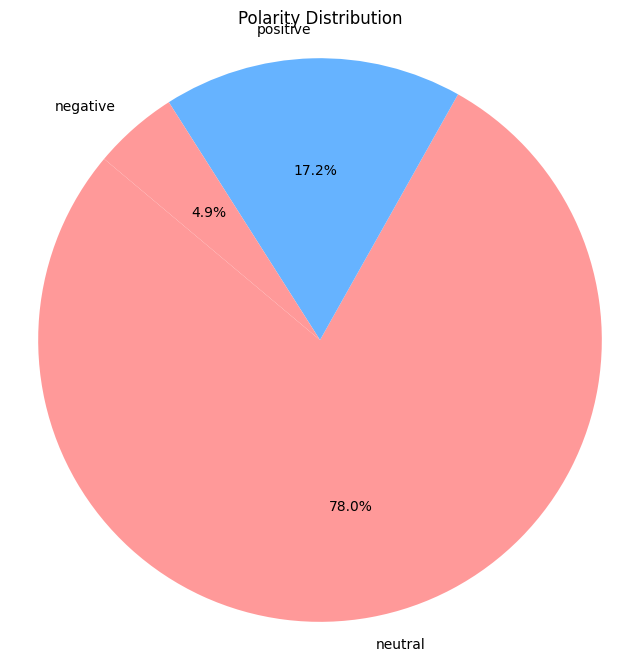

In [23]:
import matplotlib.pyplot as plt
polarity_counts = sentiment['polarity'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Polarity Distribution')
plt.axis('equal')
plt.show()

Agar data bisa seimbang dan tidak bias ketika dimasukkan ke dalam model, maka saya downsample yang neutral dan positive mengikuti jumlah negative.

In [24]:
positive = sentiment[sentiment['polarity'] == 'positive']
negative = sentiment[sentiment['polarity'] == 'negative']
neutral = sentiment[sentiment['polarity'] == 'neutral']

positive_downsampled = positive.sample(n=len(negative), random_state=42)
neutral_downsampled = neutral.sample(n=len(negative), random_state=42)
combine_pos_neg = pd.concat([positive_downsampled, negative])
sentiment_downsampled = pd.concat([combine_pos_neg, neutral_downsampled])

print(sentiment_downsampled['polarity'].value_counts())

polarity
positive    796
negative    796
neutral     796
Name: count, dtype: int64


In [25]:
sentiment = sentiment_downsampled

Sekarang kita EDA

In [26]:
sentiment.describe(include=['O'])

,reviewId,userName,userImage,content,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,polarity
count,2388,2388,2388,2388,2388,2388,2388,2388,2388,2388
unique,2388,1,1,2388,91,2386,192,2388,91,3
top,d01be5f9-4b07-47f2-8f3b-1a183fd73a91,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terkesan kemudahan investasi aplikasi indodax ...,4.0.9,2025-01-04 15:08:58,Dear member Indodax. Mohon maaf atas ketidakny...,2023-12-02 17:36:09,4.0.9,positive
freq,1,2388,2388,1,216,2,340,1,216,796


In [27]:
sentiment.describe()

,score,thumbsUpCount
count,2388.000000,2388.000000
mean,3.693886,1.796901
std,1.752039,9.450165
min,1.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,245.000000


In [28]:
sentiment.duplicated().sum()

0

In [29]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2388 entries, 5956 to 9483
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              2388 non-null   object
 1   userName              2388 non-null   object
 2   userImage             2388 non-null   object
 3   content               2388 non-null   object
 4   score                 2388 non-null   int64 
 5   thumbsUpCount         2388 non-null   int64 
 6   reviewCreatedVersion  2388 non-null   object
 7   at                    2388 non-null   object
 8   replyContent          2388 non-null   object
 9   repliedAt             2388 non-null   object
 10  appVersion            2388 non-null   object
 11  polarity              2388 non-null   object
dtypes: int64(2), object(10)
memory usage: 242.5+ KB


Liat kata yang paling sering muncul, tapi sebelum itu convert fitur content menjadi string agar tidka ada error float jika content ada floatnya

In [30]:
sentiment['content'] = sentiment['content'].astype(str)

Disini kita liat seberapa banyak kalimat yang digunakan di dalam sentimen yang positif, negatif, dan netral

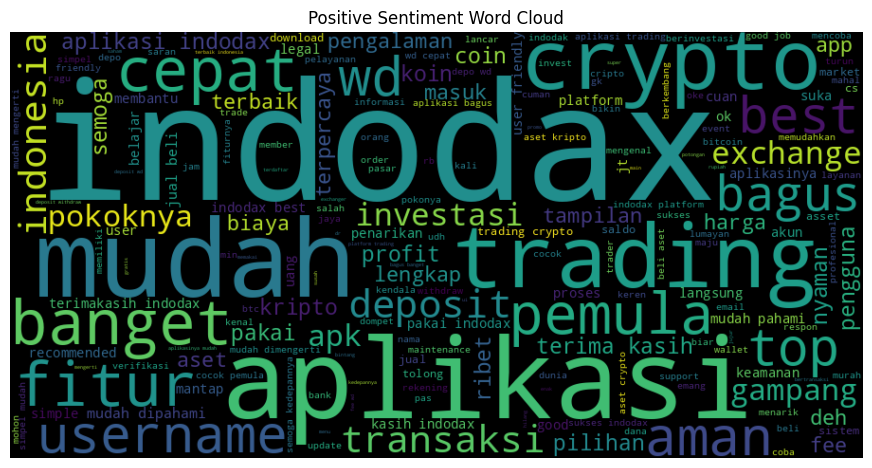

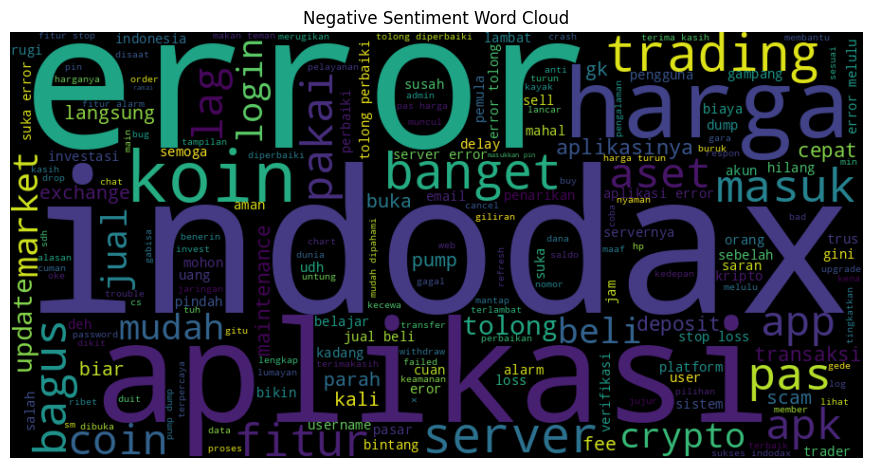

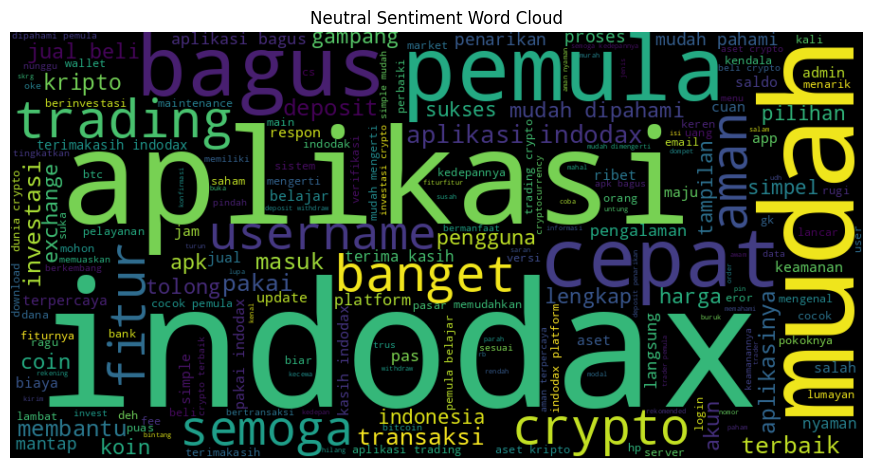

In [31]:
from wordcloud import WordCloud

positive_text = ' '.join(sentiment[sentiment['polarity'] == 'positive']['content']) # gabungin semua kata yang polaritasnya positif
negative_text = ' '.join(sentiment[sentiment['polarity'] == 'negative']['content']) # gabungin semua kata yang polaritasnya negatif
neutral_text = ' '.join(sentiment[sentiment['polarity'] == 'neutral']['content']) # gabungin semua kata yang polaritasnya netral

kata_positif = WordCloud(width=900, height=450).generate(positive_text) # bikin wordcloud dari kata positif
kata_negatif = WordCloud(width=900, height=450).generate(negative_text) # bikin wordcloud dari kata negatif
kata_netral = WordCloud(width=900, height=450).generate(neutral_text) # bikin wordcloud dari kata netral

# plot yg positif
plt.figure(figsize=(11, 6))
plt.imshow(kata_positif, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.show()

# plot yang negatif
plt.figure(figsize=(11, 6))
plt.imshow(kata_negatif, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()

# plot yang netral
plt.figure(figsize=(11, 6))
plt.imshow(kata_netral, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')
plt.show()

Kurang lebih untuk sentimen positif, kata yang sering digunakan adalah 'indodax', 'cepat', 'mudah', 'pemula', 'aplikasi', 'banget', dsb.

Untuk sentimen negatif, kata yang sering digunakan adalah 'indodax', 'error', 'aplikasi', 'koin', 'harga', dsb.

Untuk sentimen netral, kata yang sering digunakan adalah 'indodax', 'mudah', 'aplikasi', 'bagus', 'pemula', dan sebagainya

Oh ya , kita bisa liat top kata yang dipake dalam positif dan negatif dan berapa banyak dipake dari jumlah baris yang kita scrape

In [32]:
from collections import Counter

positive_words = ' '.join(sentiment[sentiment['polarity'] == 'positive']['content']).split()
negative_words = ' '.join(sentiment[sentiment['polarity'] == 'negative']['content']).split()
neutral_words = ' '.join(sentiment[sentiment['polarity'] == 'neutral']['content']).split()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)
neutral_word_counts = Counter(neutral_words)

print("Top 10 kata dalam positive reviews:", positive_word_counts.most_common(10))
print("Top 10 kata dalam negative reviews:", negative_word_counts.most_common(10))
print("Top 10 kata dalam neutral reviews:", neutral_word_counts.most_common(10))

Top 10 kata dalam positive reviews: [('indodax', 924), ('mudah', 386), ('aplikasi', 352), ('crypto', 218), ('trading', 207), ('wd', 158), ('pemula', 155), ('banget', 148), ('cepat', 141), ('bagus', 123)]
Top 10 kata dalam negative reviews: [('error', 454), ('indodax', 372), ('aplikasi', 290), ('harga', 153), ('tolong', 115), ('koin', 105), ('fitur', 100), ('server', 97), ('trading', 92), ('beli', 84)]
Top 10 kata dalam neutral reviews: [('indodax', 585), ('aplikasi', 346), ('mudah', 328), ('pemula', 171), ('crypto', 152), ('bagus', 134), ('trading', 118), ('cepat', 101), ('aman', 93), ('banget', 82)]


Distribusi kata yang dipakai

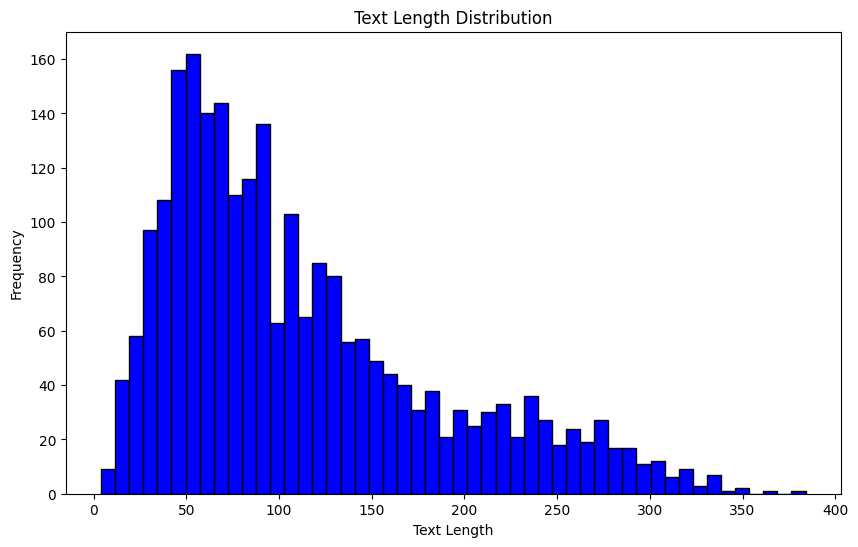

In [33]:
sentiment['text_length'] = sentiment['content'].apply(len) # itung panjang teks

# bikin plot distribusi panjang teks
plt.figure(figsize=(10, 6))
plt.hist(sentiment['text_length'], bins=50, color='blue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

### Data splitting

Pisah fitur yang dipakai dan label

In [34]:
X = sentiment['content']
y = sentiment['polarity']

## Kombinasi 1

### Train test split

80 / 20

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Tokenisasi

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [38]:
tokenizer = Tokenizer(num_words=2000, lower=True)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

Pakai pad sequence

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

Harus encode kata ini jadi numerikal pakai label encoder

In [41]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [42]:
label_encoder = LabelEncoder()
y_train_enc = to_categorical(label_encoder.fit_transform(y_train)) # pake to_categorical utk convert class vector ke binary class.
y_test_enc = to_categorical(label_encoder.transform(y_test))

### Model

LSTM Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

In [44]:
model = Sequential() # ini bikin model neural networknya yang bakal berjalan secara linear / fastforward
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) # ini model lstm  / lstm layernya
model.add(Dense(3, activation='softmax')) # karena label 3 = softmax

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train_enc, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_enc))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 282ms/step - accuracy: 0.4633 - loss: 1.0654 - val_accuracy: 0.5690 - val_loss: 0.9454
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step - accuracy: 0.6537 - loss: 0.8174 - val_accuracy: 0.6632 - val_loss: 0.6904
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - accuracy: 0.8015 - loss: 0.5282 - val_accuracy: 0.7950 - val_loss: 0.5033
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.9037 - loss: 0.2872 - val_accuracy: 0.8326 - val_loss: 0.4179
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.9545 - loss: 0.1634 - val_accuracy: 0.8745 - val_loss: 0.3793
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.9837 - loss: 0.0763 - val_accuracy: 0.8724 - val_loss: 0.4267
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.9879 - loss: 0.0461 - val_accuracy: 0.8849 - val_loss: 0.3878
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.9918 - loss: 0.0331 - val_accuracy:

Diliat dari atas, untuk training accuracynya 99.84%, which is almmost perfect, tapi ada kemungkinan overfit / gradient vanish / gradient descent

Sekarang liat testing data

In [46]:
loss, accuracy = model.evaluate(X_test_pad, y_test_enc)
print(f'Accuracy: {accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8986 - loss: 0.4403
Accuracy: 0.8765690326690674


Akurasi testing datanya 87.65%, pretty solid tapi jauh dari accuracy training, kemungkinan overfitting / vgp

## Kombinasi 2

### Train test split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=43)

Tetap lakuin yang sama, tokenisasi, pad sequence

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [49]:
tokenizer = Tokenizer(num_words=2000, lower=True)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [50]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [51]:
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [52]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [53]:
label_encoder = LabelEncoder()
y_train_enc = to_categorical(label_encoder.fit_transform(y_train)) # pake to_categorical utk convert class vector ke binary class.
y_test_enc = to_categorical(label_encoder.transform(y_test))

#### Model

GRU Model

In [54]:
from tensorflow.keras.layers import GRU

In [55]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(GRU(100, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_enc, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_enc))

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.4494 - loss: 1.0822 - val_accuracy: 0.5586 - val_loss: 0.9937
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 350ms/step - accuracy: 0.6659 - loss: 0.9054 - val_accuracy: 0.6579 - val_loss: 0.7326
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 491ms/step - accuracy: 0.7522 - loss: 0.5868 - val_accuracy: 0.7280 - val_loss: 0.6108
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 274ms/step - accuracy: 0.8950 - loss: 0.3231 - val_accuracy: 0.8033 - val_loss: 0.4903
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.9465 - loss: 0.1789 - val_accuracy: 0.8211 - val_loss: 0.4574
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 277ms/step - accuracy: 0.9744 - loss: 0.1128 - val_accuracy: 0.8504 - val_loss: 0.4432
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.9885 - loss: 0.0546 - val_accuracy: 0.8431 - val_loss: 0.4747
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 225ms/step - accuracy: 0.9955 - loss: 0.0326 - val_accurac

Akurasi trainingnya 99.89%

In [57]:
loss, accuracy = model.evaluate(X_test_pad, y_test_enc)
print(f'Accuracy: {accuracy}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8513 - loss: 0.5981
Accuracy: 0.8629707098007202


Untuk akurasi testing ternyata 86.29%, kind of overfit / vgp

## Kombinasi 3

Prosesnya sama, beda model dan values aja

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [60]:
tokenizer = Tokenizer(num_words=2000, lower=True)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [61]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [63]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [64]:
label_encoder = LabelEncoder()
y_train_enc = to_categorical(label_encoder.fit_transform(y_train)) # pake to_categorical utk convert class vector ke binary class.
y_test_enc = to_categorical(label_encoder.transform(y_test))

#### Model

Pakai Bi-LSTM

In [65]:
from tensorflow.keras.layers import Bidirectional

In [66]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
history = model.fit(X_train_pad, y_train_enc, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_enc))

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 590ms/step - accuracy: 0.4393 - loss: 1.0756 - val_accuracy: 0.5812 - val_loss: 1.0077
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 514ms/step - accuracy: 0.6533 - loss: 0.8602 - val_accuracy: 0.6365 - val_loss: 0.7346
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 506ms/step - accuracy: 0.7575 - loss: 0.5694 - val_accuracy: 0.7789 - val_loss: 0.5434
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 523ms/step - accuracy: 0.8803 - loss: 0.3387 - val_accuracy: 0.8074 - val_loss: 0.4624
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 518ms/step - accuracy: 0.9350 - loss: 0.1983 - val_accuracy: 0.8576 - val_loss: 0.3759
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 498ms/step - accuracy: 0.9791 - loss: 0.1098 - val_accuracy: 0.8693 - val_loss: 0.3670
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 490ms/step - accuracy: 0.9857 - loss: 0.0660 - val_accuracy: 0.8911 - val_loss: 0.3302
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 502ms/step - accuracy: 0.9950 - loss: 0.0383 - val_accu

Akurasi trainingnya 99.66%, akankah vgp lagi?

In [69]:
loss, accuracy = model.evaluate(X_test_pad, y_test_enc)
print(f'Accuracy: {accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9028 - loss: 0.3771
Accuracy: 0.8961474299430847


Lagi lagi akurasi testing di kisaran 89.6%.

Dari sini mungkin bisa saya simpulkan untuk random_state 42 memang membagi testing yang kurang baik saja, atau hasil scrape view yang kurang baik.

Sekarang coba prediksi input baru, dianggap positif / netral / negatif

In [70]:
def predict_sentiment(new_text, model, tokenizer, max_len):
    new_text_seq = tokenizer.texts_to_sequences([new_text])  # tokenise
    new_text_pad = pad_sequences(new_text_seq, maxlen=max_len)  # pad seq

    prediction = model.predict(new_text_pad) # prediksi dari model

    predicted_label_index = prediction.argmax()  # index probabilitas
    labels = ['negative', 'neutral', 'positive']
    predicted_label = labels[predicted_label_index]

    return predicted_label

new_input = "Indodax adalah exchange terbaik yang pernah saya pakai seumur hidup."
predicted_sentiment = predict_sentiment(new_input, model, tokenizer, max_len)
print(f"Hasil prediksi: {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step
Hasil prediksi: neutral


Hasil prediksi yang belum benar, kedepannya mungkin bisa dibenarkan dalam hal perhitungan polaritas / cara memproses lexicons.